In [1]:
cd ..

/home/boyochen/dltc


In [2]:
import matplotlib.pyplot as plt
from modules.feature_generator import load_dataset
import numpy as np
import pandas as pd

2021-12-15 13:25:19.651511: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/home/boyochen/.local/share/virtualenvs/dltc-EZrvkknN/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.4.0 and strictly below 2.7.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
data_folder = 'TCSA_data/'
bad_phase_data = load_dataset(data_folder, 'train', good_VIS_only=False)
good_phase_data = load_dataset(data_folder, 'train', good_VIS_only=True)

In [8]:
data_folder = 'TCSA_fake/'
train_data = load_dataset(data_folder, 'train', valid_profile_only=True, coordinate='polar')
valid_data = load_dataset(data_folder, 'valid', valid_profile_only=True, coordinate='polar')
test_data = load_dataset(data_folder, 'test', valid_profile_only=True, coordinate='polar')

In [ ]:
bad_phase_data['label']

In [10]:
valid_data['label']

region       ID          local_time       Vmax      R34    MSLP  \
0        WP  201501W 2015-01-12 21:38:48  18.684955   0.0000  1003.0   
1        WP  201501W 2015-01-13 00:36:24  18.566068   0.0000  1004.0   
2        WP  201501W 2015-01-13 03:34:24  19.924582   0.0000  1004.0   
3        WP  201501W 2015-01-13 06:32:48  20.680098   0.0000  1003.0   
4        WP  201501W 2015-01-13 09:31:36  22.352173   0.0000  1002.0   
...     ...      ...                 ...        ...      ...     ...   
7588     CP  201601C 2016-01-06 21:35:36  24.240785  18.5200  1004.0   
7589     CP  201601C 2016-01-09 12:23:12  25.331966  53.3376  1003.0   
7590     CP  201601C 2016-01-09 15:23:12  25.715689  70.5612  1003.0   
7591     CP  201601C 2016-01-09 18:22:48  25.440912  87.9700  1003.0   
7592     CP  201601C 2016-01-14 06:30:00  18.582000   0.0000  1008.0   

      valid_profile  
0              True  
1              True  
2              True  
3              True  
4              True  
...             ...  
7588           True  
7589           True  
7590           True  
7591           True  
7592           True  

[7593 rows x 7 columns]

In [11]:
test_data['label']

region       ID          local_time       Vmax  R34    MSLP  \
0        WP  201701W 2017-01-08 02:30:00  17.909242  0.0  1006.0   
1        WP  201701W 2017-01-08 05:29:12  17.507645  0.0  1005.0   
2        WP  201701W 2017-01-08 08:28:24  16.393379  0.0  1003.0   
3        WP  201701W 2017-01-08 11:27:12  15.485283  0.0  1003.0   
4        WP  201701W 2017-01-08 14:26:00  15.508472  0.0  1003.0   
...     ...      ...                 ...        ...  ...     ...   
7736     CP  201801C 2018-09-27 22:56:48  15.184212  0.0  1007.0   
7737     CP  201801C 2018-09-28 13:43:12  15.721962  0.0  1007.0   
7738     CP  201801C 2018-09-28 16:40:24  17.056334  0.0  1007.0   
7739     CP  201801C 2018-09-28 19:37:36  17.879671  0.0  1007.0   
7740     CP  201801C 2018-09-28 22:34:48  18.757461  0.0  1006.0   

      valid_profile  
0              True  
1              True  
2              True  
3              True  
4              True  
...             ...  
7736           True  
7737           True  
7738           True  
7739           True  
7740           True  

[7741 rows x 7 columns]

In [3]:
hour_distribution = pd.DataFrame(columns=['all', 'good'])
hour_distribution['all'] = bad_phase_data['label']['local_time'].apply(lambda x: x.hour).value_counts()
hour_distribution['good'] = good_phase_data['label']['local_time'].apply(lambda x: x.hour).value_counts()
hour_distribution = hour_distribution.fillna(0).astype(int).sort_index()
hour_distribution

all  good
0   2330     0
1   2615     0
2   2498     0
3   2356     0
4   2632     0
5   2521     0
6   2321     0
7   2635   358
8   2527  1223
9   2332  1474
10  2636  1514
11  2522  1565
12  2313  1474
13  2637  1493
14  2488  1475
15  2366  1304
16  2659   600
17  2486     0
18  2348     0
19  2641     0
20  2479     0
21  2372     0
22  2632     0
23  2491     0

(array([6.97660585e+08, 6.47287670e+07, 4.53264460e+07, 4.39111390e+07,
        4.23274190e+07, 1.33565600e+06, 1.12703700e+06, 1.67220000e+06,
        1.17610900e+06, 8.11040500e+07]),
 array([0.       , 0.22     , 0.44     , 0.66     , 0.88     , 1.1      ,
        1.32     , 1.5400001, 1.76     , 1.98     , 2.2      ],
       dtype=float32),
 <a list of 10 Patch objects>)

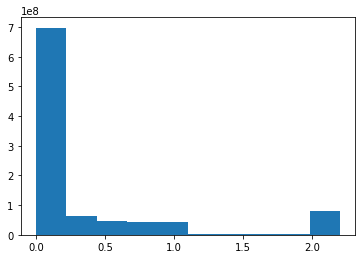

In [88]:
plt.hist(bad_phase_data['image'][:, :, :, 2].flatten())

In [4]:
def sample_VIS(phase_data, target=[]):
    bound=phase_data['image'].shape[0]
    plt.figure(figsize=(15,15))
    for i in range(9):
        if target:
            index = target[i]
        else:
            index = np.random.randint(bound)
        plt.subplot(3,3,i+1)
        plt.imshow(phase_data['image'][index, :, :, 2], cmap='gray')
        local_time = phase_data['label']['local_time'][index]
        hour = local_time.hour
        minute = local_time.minute
        formated_time = local_time.strftime("%m/%d %H:%M")
        ID = phase_data['label']['ID'][index]
        lat = phase_data['feature']['lat'][index]
        std = round(float(phase_data['image'][index, :, :, 2].std()), 3)
        mean = round(float(phase_data['image'][index, :, :, 2].mean()), 3)
        good_quality_VIS = phase_data['label']['good_quality_VIS'].loc[index]
        plt.title('(%s) %s %s' % (chr(97+i), ID, formated_time))

    plt.show()

In [5]:
def scale_to_0_1(matrix):
    out = matrix - matrix.min()
    tmp_max = out.max()
    if tmp_max != 0:
        out /= tmp_max
    return out

def show_VIS_complement_and_IR1(phase_data, target=[11759]):
    len_target = len(target)
    plt.figure(figsize=(15,5*len_target))
    for i, index in enumerate(target):
        ID = phase_data['label']['ID'][index]
        local_time = phase_data['label']['local_time'][index]
        formated_time = local_time.strftime("%m/%d %H:%M")
        IR1 = scale_to_0_1(phase_data['image'][index, :, :, 0])
        original_VIS = scale_to_0_1(phase_data['image'][index, :, :, 2])
        complement_VIS = scale_to_0_1(1 - phase_data['image'][index, :, :, 2])
        plt.subplot(len_target,3,3*i+1)
        plt.imshow(IR1, cmap='gray')
        plt.title('(%s) IR1, %s %s'%(chr(97+3*i), ID, formated_time))
        plt.subplot(len_target,3,3*i+2)
        plt.imshow(original_VIS, cmap='gray')
        distance_to_IR1 = abs(original_VIS - IR1).mean()
        plt.title('(%s) VIS, MAE with IR1: %.5lf' % (chr(97+3*i+1), distance_to_IR1))
        plt.subplot(len_target,3,3*i+3)
        plt.imshow(complement_VIS, cmap='gray')
        distance_to_IR1 = abs(complement_VIS - IR1).mean()
        plt.title('(%s) VIS_complement, MAE with IR1: %.5lf' % (chr(97+3*i+2), distance_to_IR1))
    plt.show()

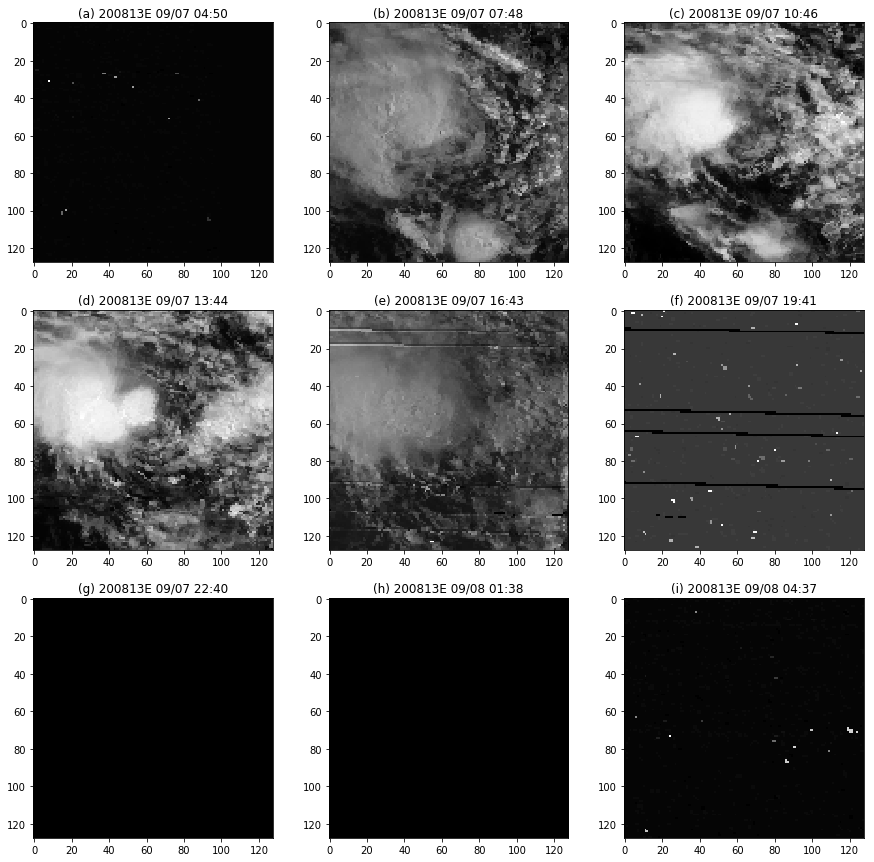

In [6]:
single_TC_index = bad_phase_data['label'].index[bad_phase_data['label']['ID'] == '200813E']

single_TC_data = {
    'image': bad_phase_data['image'][single_TC_index],
    'label': bad_phase_data['label'].loc[single_TC_index].reset_index(drop=True),
    'feature': bad_phase_data['feature'].loc[single_TC_index].reset_index(drop=True)
}

sample_VIS(single_TC_data, range(8, 18))

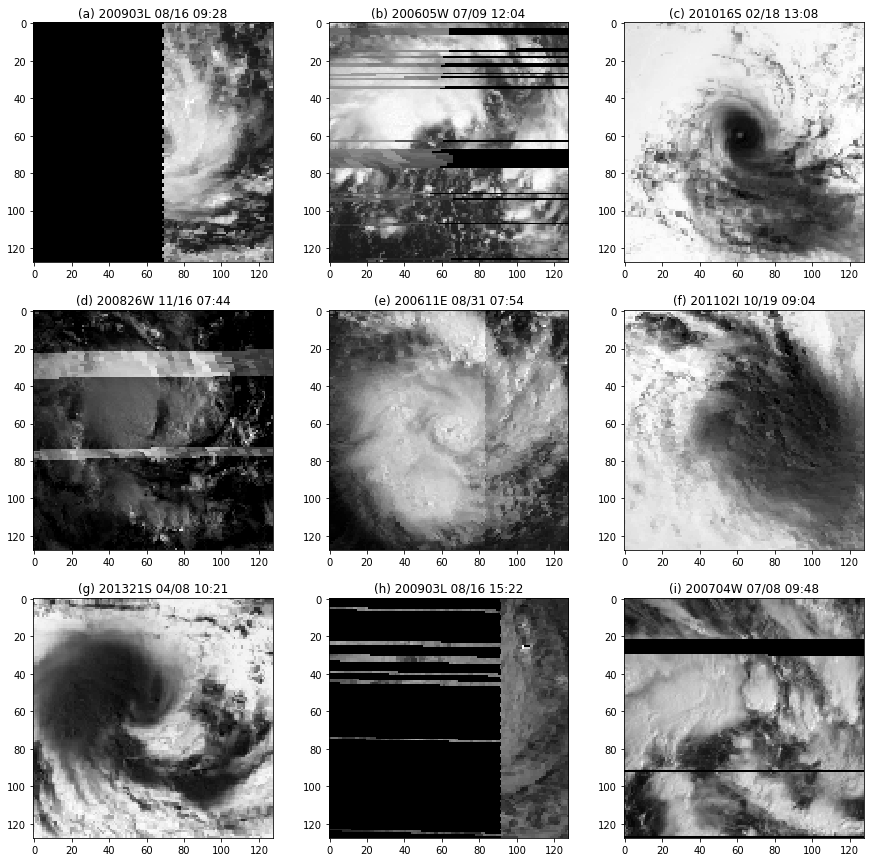

In [156]:
sample_VIS(bad_phase_data, [2168, 6014, 11759, 7215, 3484, 8104, 12329, 2170, 6457]) #index changed, won't get same output anymore

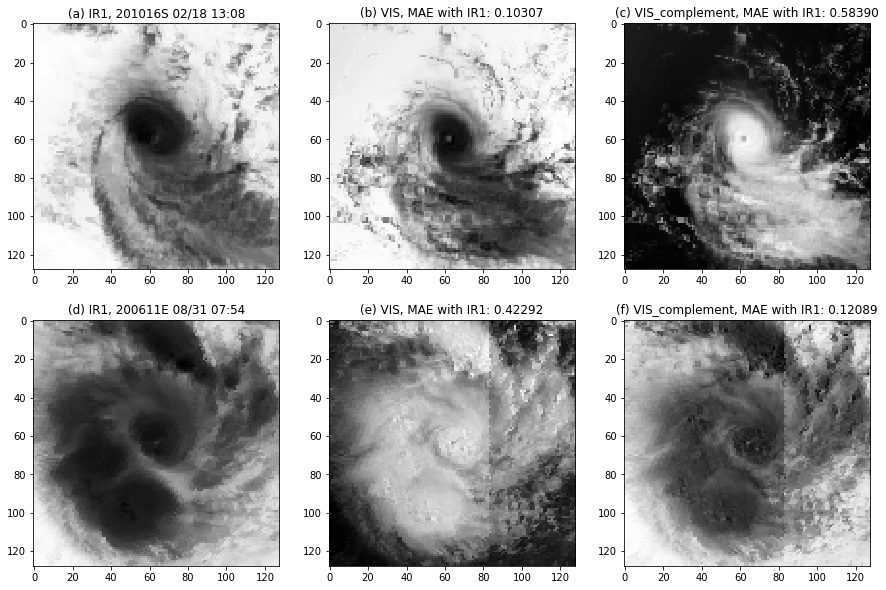

In [164]:
show_VIS_complement_and_IR1(good_phase_data, [11759, 3484]) #index changed, won't get same output anymore

In [7]:
def sample_4_channel(phase_data, target_index=45649):
    fig = plt.figure(figsize=(20,5))
    target_image = phase_data['image'][target_index]
    ID = phase_data['label']['ID'][target_index]
    local_time = phase_data['label']['local_time'][target_index]
    formated_time = local_time.strftime("%m/%d %H:%M")
    fig.suptitle('ID: %s, local time: %s'%(ID, formated_time), fontsize=20)
    for i, channel_name in enumerate(['IR1', 'WV', 'VIS', 'PMW']):
        plt.subplot(1, 4, i+1)
        plt.imshow(target_image[:, :, i], cmap='gray')
        plt.title('(%s) %s' % (chr(97+i), channel_name))

    plt.show()

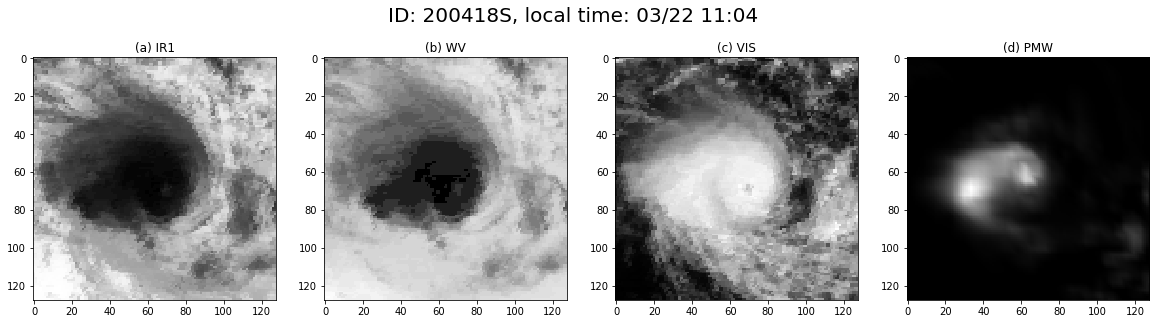

In [8]:
sample_4_channel(bad_phase_data, target_index=46085)

In [84]:
def sample_VIS_mean_std(phase_data, target=[]):
    bound=phase_data['image'].shape[0]
    plt.figure(figsize=(15,15))
    for i in range(9):
        if target:
            index = target[i]
        else:
            index = np.random.randint(bound)
            print(index)
        plt.subplot(3,3,i+1)
        plt.imshow(phase_data['image'][index, :, :, 2], cmap='gray', vmin=0, vmax=1)
        local_time = phase_data['label']['local_time'][index]
        hour = local_time.hour
        minute = local_time.minute
        formated_time = local_time.strftime("%H:%M")
        ID = phase_data['label']['ID'][index]
        lat = phase_data['feature']['lat'][index]
        std = round(float(phase_data['image'][index, :, :, 2].std()), 3)
        mean = round(float(phase_data['image'][index, :, :, 2].mean()), 3)
        good_quality_VIS = phase_data['label']['good_quality_VIS'].loc[index]
        plt.title('(%s) time:%s mean:%s std:%s' % (chr(97+i), formated_time, mean, std))

    plt.show()

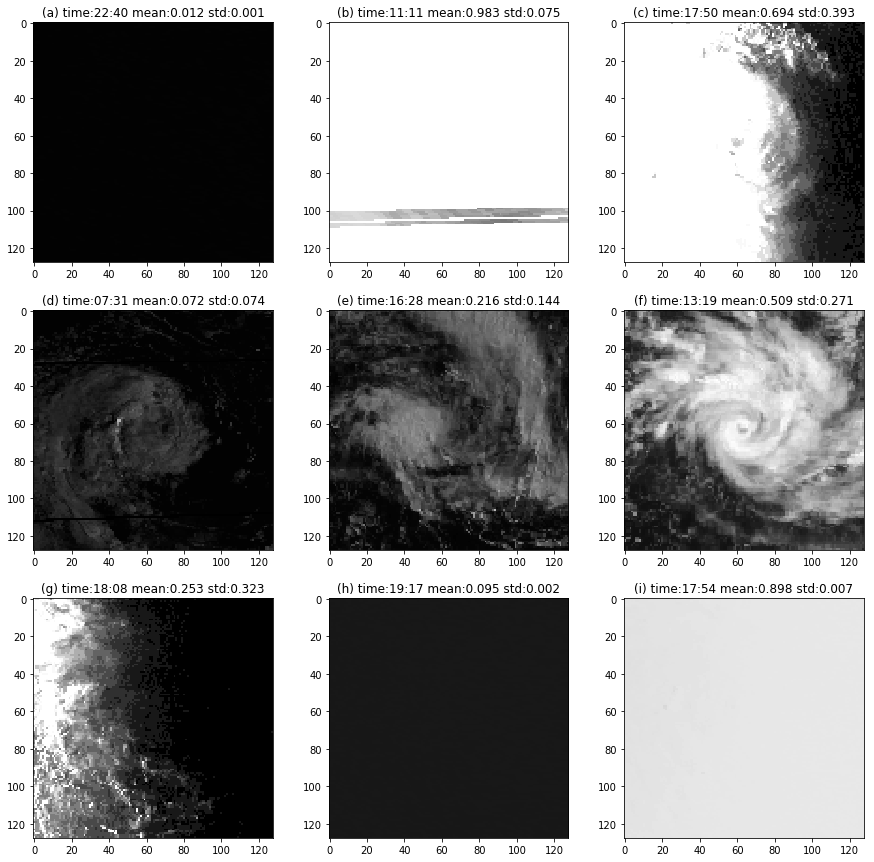

In [85]:
sample_VIS_mean_std(bad_phase_data, target=[30241, 32097, 39481, 52300, 49312, 44135, 36772, 32782, 43569])

In [86]:
bad_phase_data['image'].shape

(59837, 128, 128, 4)

In [87]:
good_phase_data['image'].shape

(12480, 128, 128, 4)

In [58]:
def IR1_WV_PMW(phase_data, target_index=None):
    bound = phase_data['image'].shape[0]
    if not target_index:
        target_index = np.random.randint(bound)
        print(target_index)
    fig = plt.figure(figsize=(25,5))
    target_image = phase_data['image'][target_index]
    ID = phase_data['label']['ID'][target_index]
    local_time = phase_data['label']['local_time'][target_index]
    formated_time = local_time.strftime("%m/%d %H:%M")
    fig.suptitle('ID: %s, local time: %s'%(ID, formated_time), fontsize=20)
    IR1 = target_image[:, :, 0]
    WV = target_image[:, :, 1]
    VIS = target_image[:, :, 2]
    PMW = target_image[:, :, 3]
    IR1_WV_diff = (WV-IR1)
    IR1_WV_diff[IR1_WV_diff<0] = 0
    IR1_WV_diff = IR1_WV_diff
    
    plt.subplot(1, 5, 1)
    plt.imshow(IR1, cmap='gray')
    plt.title('(%s) %s' % (chr(97+0), 'IR1'))
    plt.subplot(1, 5, 2)
    plt.imshow(WV, cmap='gray')
    plt.title('(%s) %s' % (chr(97+1), 'WV'))
    plt.subplot(1, 5, 3)
    plt.imshow(VIS, cmap='gray')
    plt.title('(%s) %s' % (chr(97+2), 'VIS'))
    plt.subplot(1, 5, 4)
    plt.imshow(PMW, cmap='gray')
    plt.title('(%s) %s' % (chr(97+3), 'PMW'))
    plt.subplot(1, 5, 5)
    plt.imshow(IR1_WV_diff, cmap='gray')
    plt.title('(%s) %s' % (chr(97+4), 'relu(WV-IR1)'))

    plt.show()

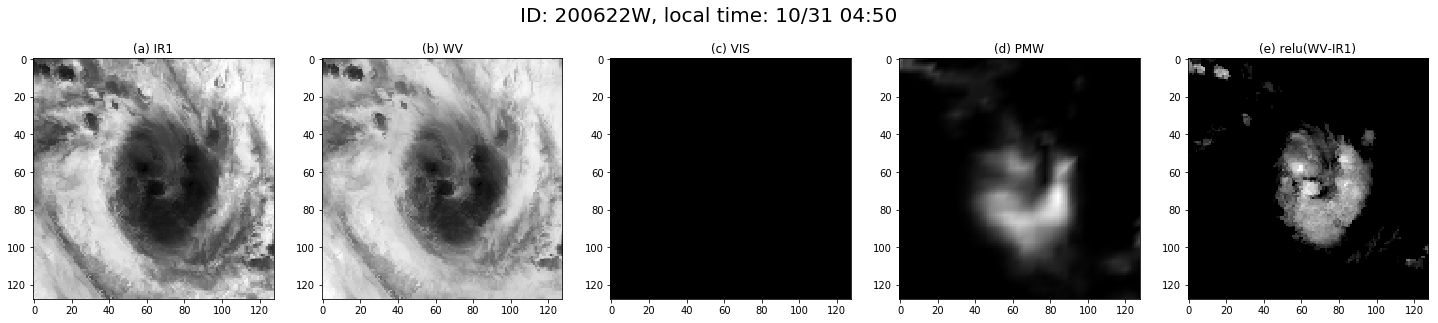

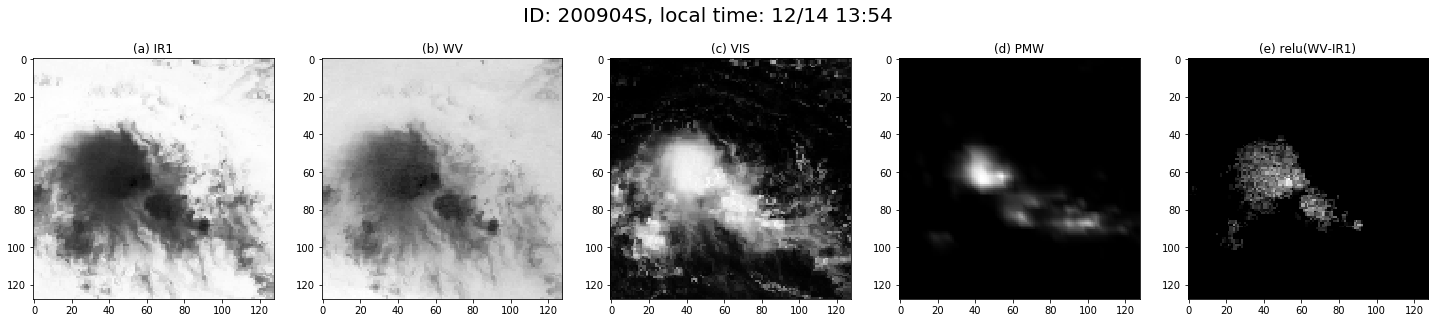

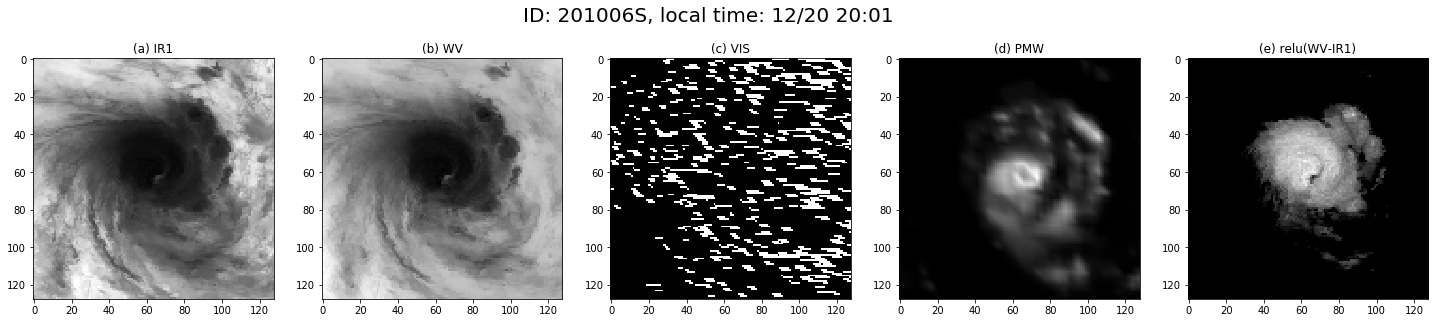

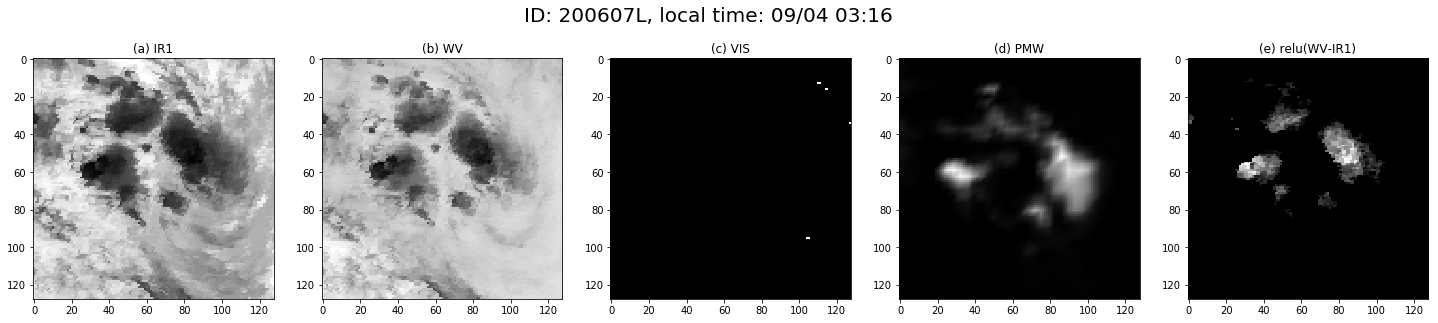

In [107]:
IR1_WV_PMW(bad_phase_data, target_index=28976)
IR1_WV_PMW(bad_phase_data, target_index=52162)
IR1_WV_PMW(bad_phase_data, target_index=53730)
IR1_WV_PMW(bad_phase_data, target_index=4392)

8725


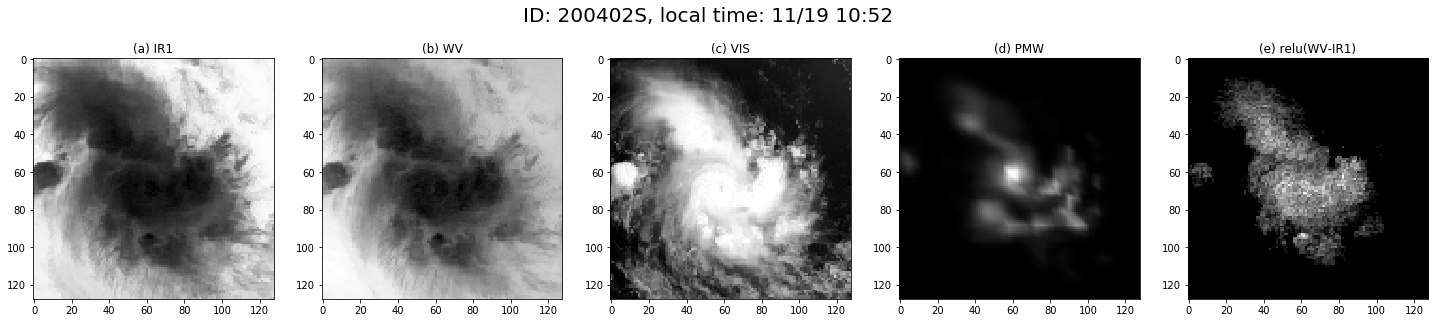

8790


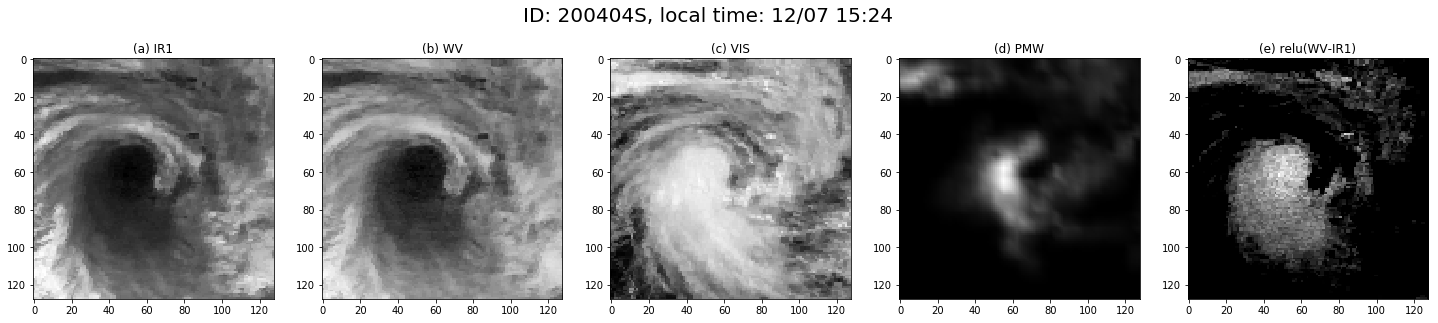

5130


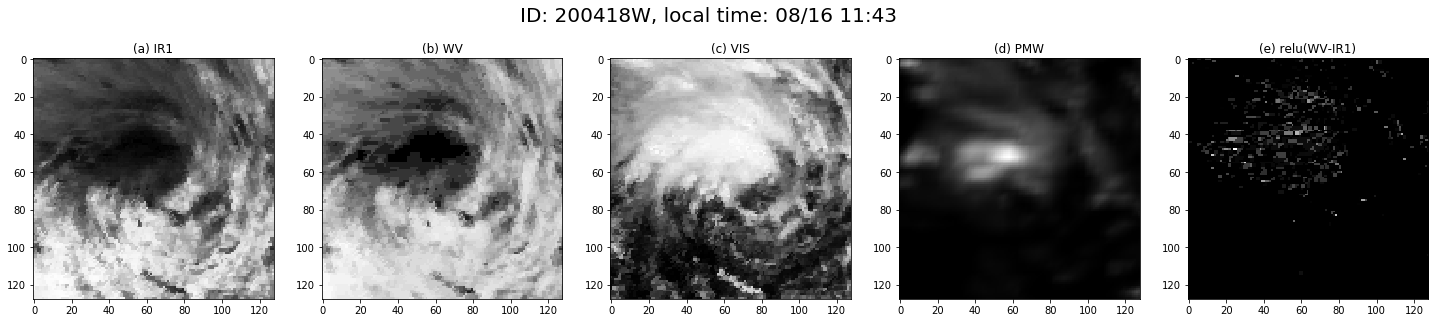

11358


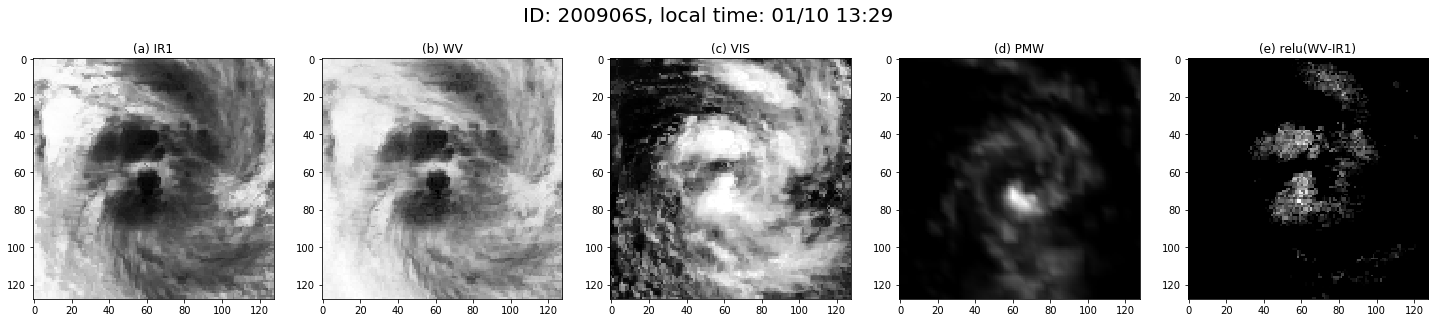

3111


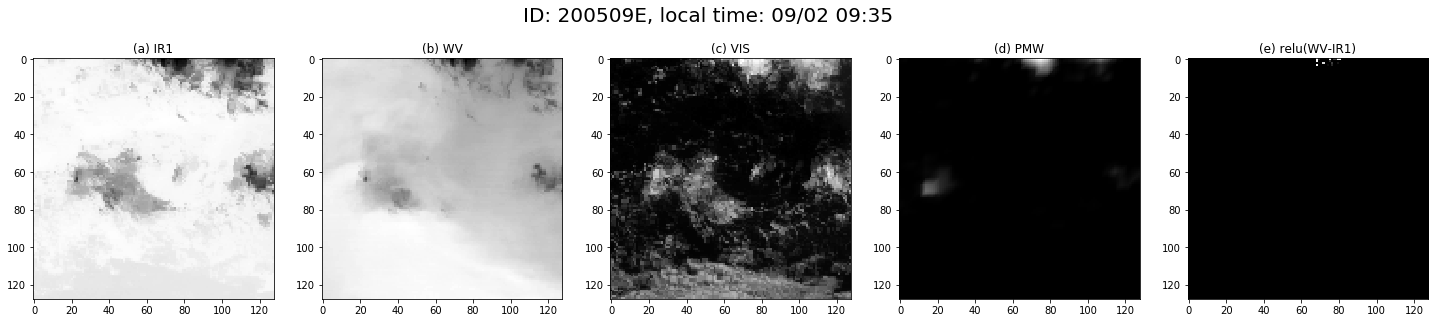

7939


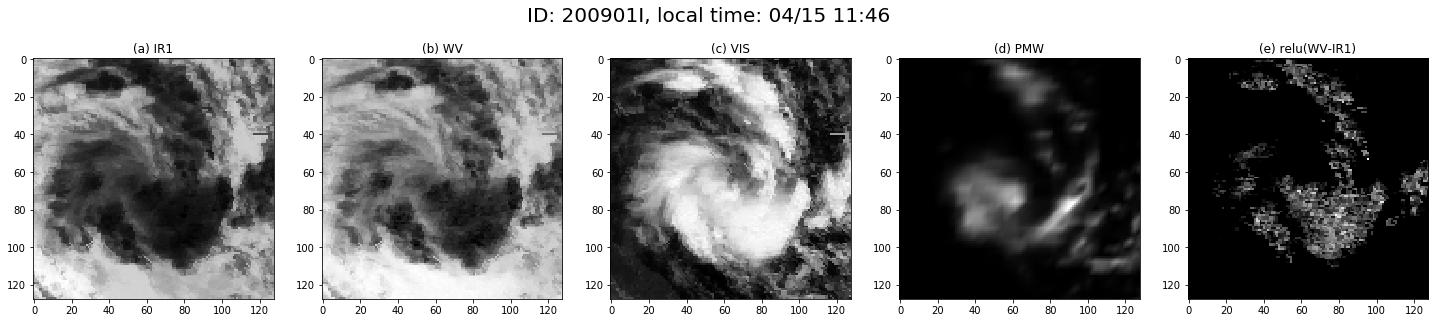

2640


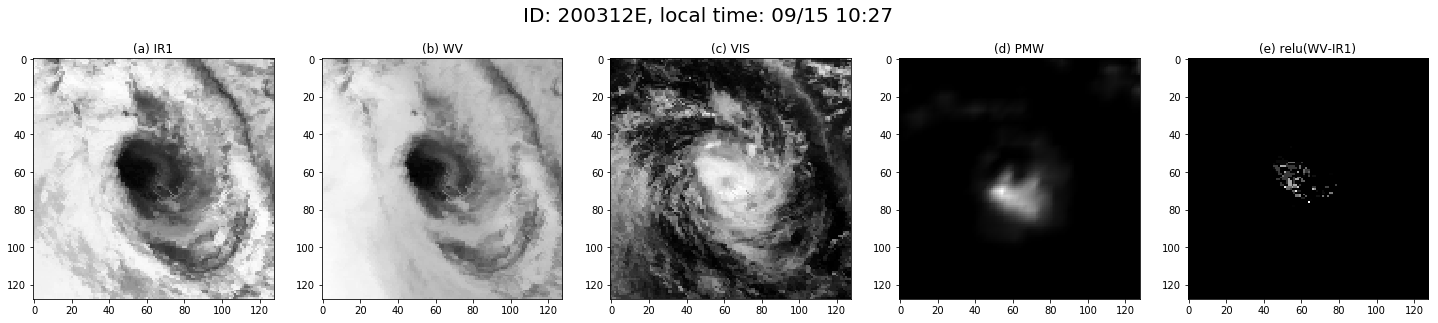

11303


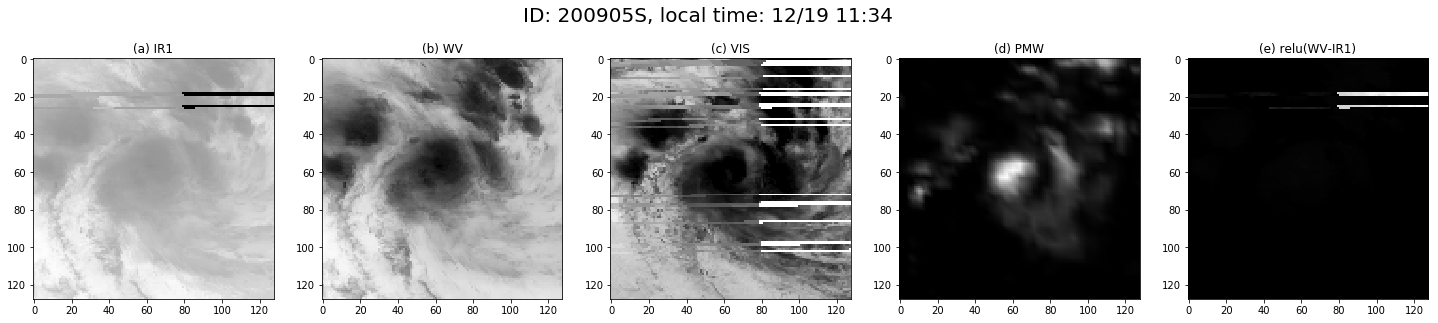

3172


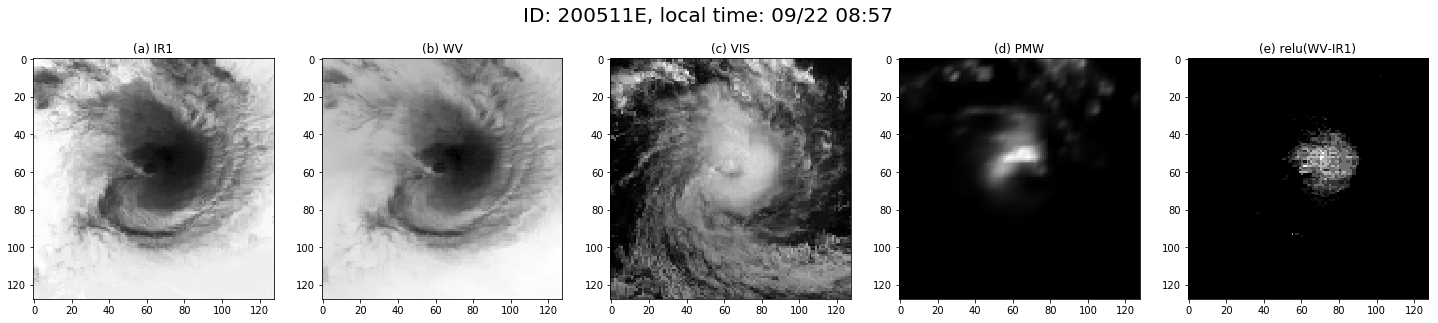

393


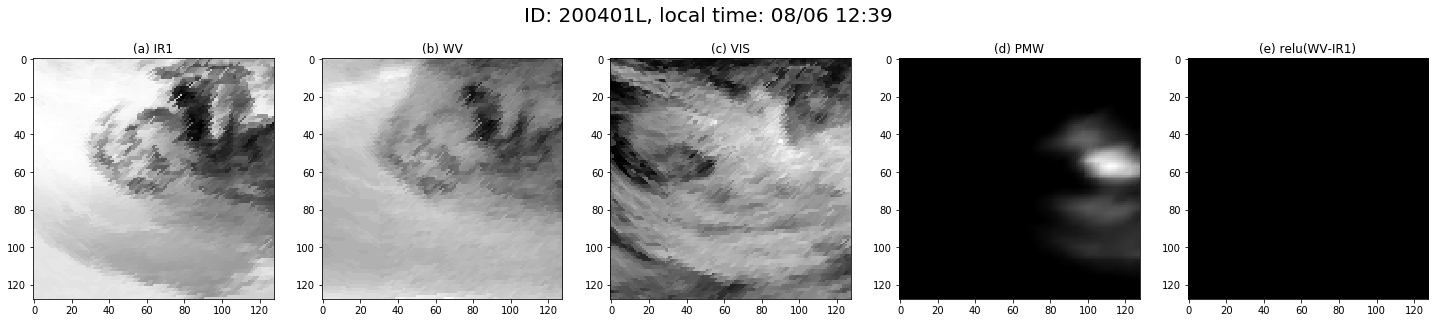

In [111]:
for i in range(10):
    IR1_WV_PMW(good_phase_data)